In [ ]:
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers.merge import concatenate
from numpy import zeros
from numpy import asarray
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers.merge import concatenate
from numpy import zeros
from numpy import asarray
import numpy as np
import os
import shutil
import nltk
nltk.download('all')
import random
import shutil
import pathlib
import string
import re
from tqdm import tqdm
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import *
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
import datetime
import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm
tqdm.pandas(desc='Progress')
from collections import Counter
from nltk import word_tokenize
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable
from sklearn.metrics import f1_score
import os 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer
from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
l = ['soc.religion.christian',
 'sci.space',
 'talk.politics.misc',
 'comp.windows.x',
 'sci.electronics',
 'comp.graphics',
 'sci.med',
 'comp.sys.ibm.pc.hardware',
 'rec.sport.hockey',
 'comp.os.ms-windows.misc',
 'sci.crypt',
 'talk.politics.mideast',
 'misc.forsale',
 'rec.motorcycles',
 'talk.religion.misc',
 'rec.autos',
 'comp.sys.mac.hardware',
 'rec.sport.baseball',
 'alt.atheism',
 'talk.politics.guns']

In [ ]:
d = 'Data'
os.makedirs(d)

In [ ]:
cd Data/

/content/Data


In [ ]:
for iterativevalue in l:
 os.makedirs(iterativevalue)

In [ ]:
!unzip /content/documentss.zip

Streaming output truncated to the last 5000 lines.
  inflating: documentss/sci.space_60892.txt  
  inflating: documentss/sci.space_60893.txt  
  inflating: documentss/sci.space_60894.txt  
  inflating: documentss/sci.space_60895.txt  
  inflating: documentss/sci.space_60896.txt  
  inflating: documentss/sci.space_60897.txt  
  inflating: documentss/sci.space_60898.txt  
  inflating: documentss/sci.space_60899.txt  
  inflating: documentss/sci.space_60900.txt  
  inflating: documentss/sci.space_60901.txt  
  inflating: documentss/sci.space_60902.txt  
  inflating: documentss/sci.space_60903.txt  
  inflating: documentss/sci.space_60904.txt  
  inflating: documentss/sci.space_60905.txt  
  inflating: documentss/sci.space_60906.txt  
  inflating: documentss/sci.space_60907.txt  
  inflating: documentss/sci.space_60908.txt  
  inflating: documentss/sci.space_60909.txt  
  inflating: documentss/sci.space_60910.txt  
  inflating: documentss/sci.space_60911.txt  
  inflating: documentss/sci.s

In [ ]:
import zipfile
with zipfile.ZipFile('/content/documentss.zip', 'r') as z:
    z.extractall('/content/documentsnew')

In [ ]:
s = '/content/documentsnew/documentss'
d = '/content/Data/'
df = os.listdir(s)
for fvalue in df:
  for iterativevalue in l:
    if (fvalue.startswith(iterativevalue)):
      shutil.move(s+'/'+fvalue,d+'/'+iterativevalue)

In [ ]:
dp = '/content/Data'

In [ ]:
shutil.rmtree('/content/Data/documentss')

In [ ]:
listone = []
listtwo = []
for iterativevalue in os.listdir(dp):
  listone.append(iterativevalue)
  listtwo.append(len(os.listdir(os.path.join(dp,iterativevalue))))
  print("Files in folder  ",iterativevalue," ",len(os.listdir(os.path.join(dp,iterativevalue))))

Files in folder   sci.med   990
Files in folder   comp.windows.x   980
Files in folder   comp.sys.ibm.pc.hardware   982
Files in folder   comp.graphics   973
Files in folder   soc.religion.christian   997
Files in folder   misc.forsale   972
Files in folder   sci.space   987
Files in folder   rec.sport.hockey   999
Files in folder   talk.politics.misc   775
Files in folder   talk.politics.guns   910
Files in folder   comp.os.ms-windows.misc   985
Files in folder   talk.politics.mideast   940
Files in folder   rec.motorcycles   994
Files in folder   alt.atheism   799
Files in folder   rec.autos   990
Files in folder   rec.sport.baseball   994
Files in folder   comp.sys.mac.hardware   961
Files in folder   talk.religion.misc   628
Files in folder   sci.electronics   981
Files in folder   sci.crypt   991


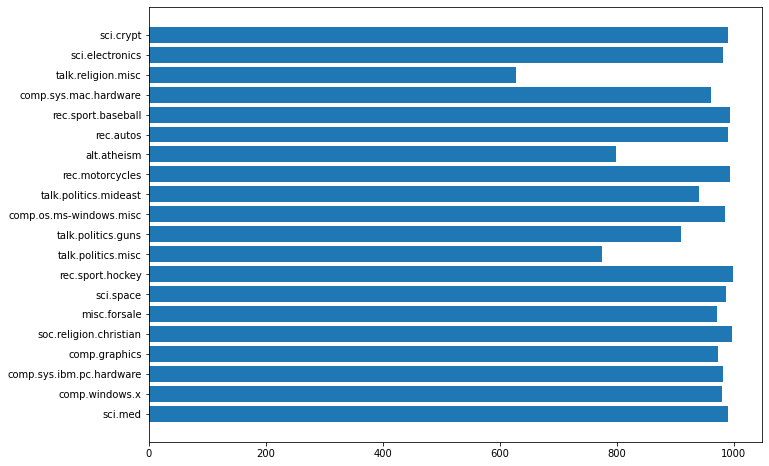

In [ ]:
plt.figure(figsize=(11,8))
plt.barh(listone,listtwo)
plt.show()

In [ ]:
dp = "Data"
drt = pathlib.Path(dp)
print(drt)

Data


In [ ]:
aldoat = list(drt.glob('*/*'))
aldoat = [str(path) for path in aldoat]
aldoat[18827]

'Data/sci.crypt/sci.crypt_15582.txt'

In [ ]:
def emailpreprocessing(sampletxt):
  f = []
  e = re.findall("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)", sampletxt)

  if len(e) > 0:
    listvalue = []
    for iterativevalue in range(len(e)):
      s = re.split('@',e[iterativevalue])
      listvalue.append(s[1])
    listone = []
    n = []
    for iterativevalue in range(len(listvalue)):
      s = re.split('[.]',listvalue[iterativevalue])
      listone.append(s)
    
    for iterativevalue in listone:
      n +=iterativevalue
    for iterativevalue in n:
      if len(iterativevalue)>2:
        f.append(iterativevalue)
    for iterativevalue in f:
      if iterativevalue=='com'or iterativevalue=='Com':
        f.remove(iterativevalue)
    f = [" ".join(map(str, f))]            
  return e,f

In [ ]:
flvalue = open(aldoat[1684], "r", encoding='latin1')
avalue=flvalue.read()
print(avalue)
evalue,fvalue = emailpreprocessing(avalue)
print(evalue)
print(fvalue)
avalue=re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)",' ',avalue)
print(avalue)

From: abarden@tybse1.uucp (Ann Marie Barden)
Subject: X-Terminal Config. file question

  QUESTION:
  What is the EXACT entry (parameter and syntax please), in the X-Terminal
configuration file (loaded when the X-Terminal boots), to add another system 
to the TCP/IP access control list?   

  BACKGROUND:
  I have two unix systems, 1. an AT&T 3B2 running X11R3 and MIT's X11R4 and 
2. a Sun SS10 without any X.  
  I want to have a window to the Sun and the 3B2 on the NCD X-Terminal at the
same time.  I can do this if I manually set the Network Parameter TCP/IP
Access Control List to off, then login to my telnet session. Not Great!  
  I've tried to get "xhost" to work and failed.  Either my syntax is wrong
or the X11R3 implementation is bogus.  
  I am trying to edit the NCD configuration file that is loaded when the 
NCD boots.  No matter what entry I add or edit, the NCD still boots with
the TCP/IP Access Control list containing only the 3B2.
  My manuals are worthless so any help woul

In [ ]:
def sbjt(sampletxt):
  sampletxt = re.sub(r"Re:"," ",sampletxt,flags=re.MULTILINE)
  livalue = re.findall(r'^Subject.*$',sampletxt, re.MULTILINE)
  svalue = livalue[0]
  for iterativevalue in string.punctuation:
      svalue = svalue.replace(iterativevalue," ")
  svalue = re.sub(r"Re:"," ",svalue, re.MULTILINE)
  svalue = svalue.lower()
  svalue = re.sub(r'Subject'," ",svalue,flags=re.IGNORECASE)
  svalue=re.sub(r"\s+", " ", svalue)
  svalue=re.sub(r"^\s+", "", svalue)
  return svalue

In [ ]:
sjts = sbjt(avalue)
avalue=re.sub(r'Subject.*$'," ",avalue,flags=re.MULTILINE)
print(avalue)

From:   (Ann Marie Barden)
 

  QUESTION:
  What is the EXACT entry (parameter and syntax please), in the X-Terminal
configuration file (loaded when the X-Terminal boots), to add another system 
to the TCP/IP access control list?   

  BACKGROUND:
  I have two unix systems, 1. an AT&T 3B2 running X11R3 and MIT's X11R4 and 
2. a Sun SS10 without any X.  
  I want to have a window to the Sun and the 3B2 on the NCD X-Terminal at the
same time.  I can do this if I manually set the Network Parameter TCP/IP
Access Control List to off, then login to my telnet session. Not Great!  
  I've tried to get "xhost" to work and failed.  Either my syntax is wrong
or the X11R3 implementation is bogus.  
  I am trying to edit the NCD configuration file that is loaded when the 
NCD boots.  No matter what entry I add or edit, the NCD still boots with
the TCP/IP Access Control list containing only the 3B2.
  My manuals are worthless so any help would be most appreciated!!  Thanks!

Ann Marie Barden  	 



In [ ]:
def deconvaluesfun(para):
    
    para = re.sub(r"won\'t", "will not", para)
    para = re.sub(r"can\'t", "can not", para)
    para = re.sub(r"n\'t", " not", para)
    para = re.sub(r"\'re", " are", para)
    para = re.sub(r"\'s", " is", para)
    para = re.sub(r"\'d", " would", para)
    para = re.sub(r"\'ll", " will", para)
    para = re.sub(r"\'t", " not", para)
    para = re.sub(r"\'ve", " have", para)
    para = re.sub(r"\'m", " am", para)
    return para

In [ ]:
print(deconvaluesfun(avalue))

From:   (Ann Marie Barden)
 

  QUESTION:
  What is the EXACT entry (parameter and syntax please), in the X-Terminal
configuration file (loaded when the X-Terminal boots), to add another system 
to the TCP/IP access control list?   

  BACKGROUND:
  I have two unix systems, 1. an AT&T 3B2 running X11R3 and MIT is X11R4 and 
2. a Sun SS10 without any X.  
  I want to have a window to the Sun and the 3B2 on the NCD X-Terminal at the
same time.  I can do this if I manually set the Network Parameter TCP/IP
Access Control List to off, then login to my telnet session. Not Great!  
  I have tried to get "xhost" to work and failed.  Either my syntax is wrong
or the X11R3 implementation is bogus.  
  I am trying to edit the NCD configuration file that is loaded when the 
NCD boots.  No matter what entry I add or edit, the NCD still boots with
the TCP/IP Access Control list containing only the 3B2.
  My manuals are worthless so any help would be most appreciated!!  Thanks!

Ann Marie Barden  	 


In [ ]:
def chunfunction(sampletxt):
  ckslist=[]
  ckslist=(list(ne_chunk(pos_tag(word_tokenize(sampletxt)))))
  for iterativevalue in ckslist:
    if type(iterativevalue)==Tree:
      if iterativevalue.label() == "GPE":
        jitervalue = iterativevalue.leaves()
        if len(jitervalue)>1:
          gpvalue = "_".join([tvalue for tvalue,pvalue in jitervalue])
          sampletxt = re.sub(rf'{jitervalue[1][0]}',gpvalue,sampletxt, flags=re.MULTILINE)           
          sampletxt = re.sub(rf'\b{jitervalue[0][0]}\b',"",sampletxt, flags=re.MULTILINE) 
      if iterativevalue.label()=="PERSON":
        for tvalue,pvalue in iterativevalue.leaves():
          sampletxt = re.sub(re.escape(tvalue),"",sampletxt, flags=re.MULTILINE)
  return sampletxt

In [ ]:
print(chunfunction(avalue))

From:   (  )
 

  QUESTION:
  What is the EXACT entry (parameter and syntax please), in the X-Terminal
configuration file (loaded when the X-Terminal boots), to add another system 
to the TCP/IP access control list?   

  BACKGROUND:
  I have two unix systems, 1. an AT&T 3B2 running  and MIT's  and 
2. a Sun SS10 without any X.  
  I want to have a window to the Sun and the 3B2 on the NCD X-Terminal at the
same time.  I can do this if I manually set the Network Parameter TCP/IP
Access Control List to off, then login to my telnet session. Not Great!  
  I've tried to get "xhost" to work and failed.  Either my syntax is wrong
or the  implementation is bogus.  
  I am trying to edit the NCD configuration file that is loaded when the 
NCD boots.  No matter what entry I add or edit, the NCD still boots with
the TCP/IP Access Control list containing only the 3B2.
  My manuals are worthless so any help would be most appreciated!!  Thanks!

    	 



In [ ]:
avalue = re.sub(r'\w+:\s?','',avalue)
print(avalue)

  (Ann Marie Barden)
 

    What is the EXACT entry (parameter and syntax please), in the X-Terminal
configuration file (loaded when the X-Terminal boots), to add another system 
to the TCP/IP access control list?   

    I have two unix systems, 1. an AT&T 3B2 running X11R3 and MIT's X11R4 and 
2. a Sun SS10 without any X.  
  I want to have a window to the Sun and the 3B2 on the NCD X-Terminal at the
same time.  I can do this if I manually set the Network Parameter TCP/IP
Access Control List to off, then login to my telnet session. Not Great!  
  I've tried to get "xhost" to work and failed.  Either my syntax is wrong
or the X11R3 implementation is bogus.  
  I am trying to edit the NCD configuration file that is loaded when the 
NCD boots.  No matter what entry I add or edit, the NCD still boots with
the TCP/IP Access Control list containing only the 3B2.
  My manuals are worthless so any help would be most appreciated!!  Thanks!

Ann Marie Barden  	 



In [ ]:
def preprfunct(avalue):
  
  evalue,lofpremail= emailpreprocessing(avalue)
  avalue = re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)",' ',avalue)
  subjects = sbjt(avalue)
  avalue=re.sub(r'Subject.*$'," ",avalue,flags=re.MULTILINE)
  avalue = re.sub(r"Write to:.*$","",avalue, flags=re.MULTILINE)           
  avalue= re.sub(r"From:.*$","",avalue, flags=re.MULTILINE)               
  avalue = re.sub(r"or:"," ",avalue,flags=re.MULTILINE)
  avalue = re.sub(r"<.*>","",avalue, flags=re.MULTILINE) 
  avalue = re.sub(r"\(.*\)","",avalue,flags=re.MULTILINE)
  avalue= re.sub(r"\([^()]*\)", "", avalue) 
  avalue = re.sub(r"[\n\t\-\\\/]"," ",avalue, flags=re.MULTILINE)
  avalue = re.sub(r'\w+:\s?','',avalue)
  avalue=deconvaluesfun(avalue)
  avalue = chunfunction(avalue)
  avalue= re.sub('[0-9\n]',' ',avalue)
  avalue = re.sub(r"\b_([a-zA-z]+)_\b",r"\1",avalue)     
  avalue = re.sub(r"\b_([a-zA-z]+)\b",r"\1",avalue) 
  avalue = re.sub(r"\b([a-zA-z]+)_\b",r"\1",avalue) 
  avalue = re.sub(r"\b[a-zA-Z]{1}_([a-zA-Z]+)",r"\1",avalue) 
  avalue = re.sub(r"\b[a-zA-Z]{2}_([a-zA-Z]+)",r"\1",avalue) 
  avalue = avalue.lower()      
  avalue = re.sub(r'\b\w{1,2}\b'," ",avalue) 
  avalue = re.sub(r"\b\w{15,}\b"," ",avalue) 
  avalue = re.sub(r"[^a-zA-Z_]"," ",avalue)                                         
  avalue = re.sub(r" {2,}", " ", avalue, flags=re.MULTILINE) 
  return (lofpremail,subjects,avalue)

In [ ]:
flvalue = open('/content/Data/alt.atheism/alt.atheism_49960.txt', "r", encoding='latin1')
itvalue=flvalue.read()
print(itvalue)

From: mathew <mathew@mantis.co.uk>
Subject: Alt.Atheism FAQ: Atheist Resources

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December 1992
Version: 1.0

                              Atheist Resources

                      Addresses of Atheist Organizations

                                     USA

FREEDOM FROM RELIGION FOUNDATION

Darwin fish bumper stickers and assorted other atheist paraphernalia are
available from the Freedom From Religion Foundation in the US.

Write to:  FFRF, P.O. Box 750, Madison, WI 53701.
Telephone: (608) 256-8900

EVOLUTION DESIGNS

Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones
Christians stick on their cars, but with feet and the word "Darwin" written
inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.

Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,
           CA 91605.

People in the San Francisco Bay area can get Darwin Fish from Lynn Gold

In [ ]:
preemail,presubj,pretxt=preprfunct(itvalue)
print(preemail)
print(presubj)
pretxt

['mantis netcom mantis']
alt atheism faq atheist resources


' archive atheism resources alt atheism archive resources last december atheist resources addresses atheist organizations usa freedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the evolution designs evolution designs sell the fish fish symbol like the ones stick their cars but with feet and the word written inside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get from try mailing for net people who directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the bible handbook and american atheist isbn edition bible contradictions absurdities atrocities immoralities contains the bible contradicts itself aap based the king version the bible austin prometheus books sell books including holy horrors alternate address prometheus african americans for humanism organ

In [ ]:
dlistvalue = []
preemail=[]
presubj = None
pretxt =None
for iterativevalue in tqdm(range(len(aldoat))):
  splits = re.split('/|_',aldoat[iterativevalue])
  labels = splits[1]
  flvalue = open(aldoat[iterativevalue], "r", encoding='latin1')
  avalue=flvalue.read()
  tvalue = avalue
  preemail,presubj,pretxt= preprfunct(avalue)
  dlistvalue.append((tvalue,labels,preemail,presubj,pretxt))

  0%|          | 0/18828 [00:00<?, ?it/s]

In [ ]:
dvalue = pd.DataFrame(dlistvalue, columns=('text', 'class','preprocessed_emails', 'preprocessed_subject','preprocessed_text'))
dvalue

,text,class,preprocessed_emails,preprocessed_subject,preprocessed_text
0,From: per-arne.melander@histocel.umu.se (Per-A...,sci.med,[histocel umu histocel umu],help purification of neutrophils from mice,hello need technique for separation neutrophi...
1,From: kutuzova@venus.iteb.serpukhov.su\nSubjec...,sci.med,[venus iteb serpukhov venus iteb serpukhov],the reseaching of starvation,very interested investigations starvation for...
2,From: mary@uicsl.csl.uiuc.edu (Mary E. Allison...,sci.med,[uicsl csl uiuc edu rtsg mot spdcc village vil...,is msg sensitivity superstition,these are last words the subject person who v...
3,From: chorley@vms.ocom.okstate.edu\nSubject: C...,sci.med,[vms ocom okstate edu],cs gas and allergic response ques,this question derives from the waco could par...
4,From: jil@donuts0.uucp (Jamie Lubin)\nSubject:...,sci.med,[donuts0 uucp pitt UUCP pitt edu world std wor...,eye dominance,article article there right eye dominance the...
...,...,...,...,...,...
18823,From: feustel@netcom.com (David Feustel)\nSubj...,sci.crypt,[netcom netcom],the escrow database,and the fox has rabies too myi
18824,From: ee92jks@brunel.ac.uk (Jonathan K Saville...,sci.crypt,[brunel jet brunel],triple des,have seen various references notriple des rec...
18825,From: mbeckman@mbeckman.mbeckman.com (Mel Beck...,sci.crypt,[mbeckman mbeckman netcom netcom mbeckman],suggestions for escrow agencies was more techn...,article the easiest way user fee for each cli...
18826,From: Rick Miller - former spook <rick@ee.uwm....,sci.crypt,[uwm edu signal ece clarkson edu soe uwm edu d...,alternate legal wiretaps,would strong incentive points out for more po...


In [ ]:
dvalue.to_csv('afterprepressoingf.csv')

In [ ]:
dvalue = pd.read_csv("afterprepressoingf.csv")

In [ ]:
dvalue = dvalue.drop('Unnamed: 0',axis=1)

In [ ]:
listvalue=[]
for iterativevalue in range(len(dvalue)):
  avalue= None
  avalue =dvalue['preprocessed_emails'][iterativevalue]
  avalue = re.sub(r"[^a-zA-Z_]"," ",avalue)
  avalue= re.sub(r"^\s+|\s+$", "",avalue)
  avalue= re.sub('[0-9\n]',' ',avalue)
  avalue=re.sub(r'[com]','',avalue)
  avalue=re.sub(r'[Com]','',avalue)
  listvalue.append(avalue)

In [ ]:
avalue=dvalue['preprocessed_emails'][567]
print(avalue)
avalue=re.sub(r'[com]','',avalue)

['berkeley edu berkeley edu berkeley edu']


In [ ]:
dvalue['preprocessed_emails'] = listvalue

In [ ]:
listvalue = list(dvalue['preprocessed_emails'].str.lower())

In [ ]:
dvalue.to_csv('finessedvalue.csv')

In [ ]:
dvalue = pd.read_csv("/content/finessedvalue.csv")
dvalue = dvalue.drop('Unnamed: 0',axis=1)
dvalue.head()

,text,class,preprocessed_emails,preprocessed_subject,preprocessed_text
0,From: per-arne.melander@histocel.umu.se (Per-A...,sci.med,histel uu histel uu,help purification of neutrophils from mice,hello need technique for separation neutrophi...
1,From: kutuzova@venus.iteb.serpukhov.su\nSubjec...,sci.med,venus iteb serpukhv venus iteb serpukhv,the reseaching of starvation,very interested investigations starvation for...
2,From: mary@uicsl.csl.uiuc.edu (Mary E. Allison...,sci.med,uisl sl uiu edu rtsg t spd village village vil...,is msg sensitivity superstition,these are last words the subject person who v...
3,From: chorley@vms.ocom.okstate.edu\nSubject: C...,sci.med,vs kstate edu,cs gas and allergic response ques,this question derives from the waco could par...
4,From: jil@donuts0.uucp (Jamie Lubin)\nSubject:...,sci.med,dnuts uup pitt UUP pitt edu wrld std wrld std,eye dominance,article article there right eye dominance the...


In [ ]:
dvalue.columns

Index(['text', 'class', 'preprocessed_emails', 'preprocessed_subject',
       'preprocessed_text'],
      dtype='object')

In [ ]:
dvalue.iloc[567]

text                    From: Dan Wallach <dwallach@cs.berkeley.edu>\n...
class                                                             sci.med
preprocessed_emails                berkeley edu berkeley edu berkeley edu
preprocessed_subject    faq typing injuries 1 4 changes since last mon...
preprocessed_text        archive typing injury faq changes this file d...
Name: 567, dtype: object

In [ ]:
dvalue.isnull().sum()

text                     0
class                    0
preprocessed_emails     55
preprocessed_subject     1
preprocessed_text        0
dtype: int64

In [ ]:
dvalue['preprocessed_emails'].fillna(" ", inplace = True) 
dvalue['preprocessed_subject'].fillna(" ", inplace = True)

In [ ]:
dvalue = dvalue.dropna(axis = 0, how ='any')
len(dvalue)

18828

In [ ]:
dvalue.columns

Index(['text', 'class', 'preprocessed_emails', 'preprocessed_subject',
       'preprocessed_text'],
      dtype='object')

In [ ]:
dvalue['final_text'] = dvalue['preprocessed_emails']+" "+dvalue['preprocessed_subject']+" "+dvalue['preprocessed_text']
dvalue.head()

,text,class,preprocessed_emails,preprocessed_subject,preprocessed_text,final_text
0,From: per-arne.melander@histocel.umu.se (Per-A...,sci.med,histel uu histel uu,help purification of neutrophils from mice,hello need technique for separation neutrophi...,histel uu histel uu help purification of neutr...
1,From: kutuzova@venus.iteb.serpukhov.su\nSubjec...,sci.med,venus iteb serpukhv venus iteb serpukhv,the reseaching of starvation,very interested investigations starvation for...,venus iteb serpukhv venus iteb serpukhv the re...
2,From: mary@uicsl.csl.uiuc.edu (Mary E. Allison...,sci.med,uisl sl uiu edu rtsg t spd village village vil...,is msg sensitivity superstition,these are last words the subject person who v...,uisl sl uiu edu rtsg t spd village village vil...
3,From: chorley@vms.ocom.okstate.edu\nSubject: C...,sci.med,vs kstate edu,cs gas and allergic response ques,this question derives from the waco could par...,vs kstate edu cs gas and allergic response qu...
4,From: jil@donuts0.uucp (Jamie Lubin)\nSubject:...,sci.med,dnuts uup pitt UUP pitt edu wrld std wrld std,eye dominance,article article there right eye dominance the...,dnuts uup pitt UUP pitt edu wrld std wrld std...


In [ ]:
valueoflabencod = preprocessing.LabelEncoder() 
dvalue['label']= valueoflabencod.fit_transform(dvalue['class']) 
valueoflabencod.inverse_transform(dvalue['label'])

array(['sci.med', 'sci.med', 'sci.med', ..., 'sci.crypt', 'sci.crypt',
       'sci.crypt'], dtype=object)

In [ ]:
fdata = pd.DataFrame(list(dvalue['final_text']),columns=['final_text'])

In [ ]:
fdata.isnull().sum()

final_text    0
dtype: int64

In [ ]:
fdata[fdata['final_text'].notnull()]

,final_text
0,histel uu histel uu help purification of neutr...
1,venus iteb serpukhv venus iteb serpukhv the re...
2,uisl sl uiu edu rtsg t spd village village vil...
3,vs kstate edu cs gas and allergic response qu...
4,dnuts uup pitt UUP pitt edu wrld std wrld std...
...,...
18823,net net the escrow database and the fox has ...
18824,brunel jet brunel triple des have seen variou...
18825,bekan bekan net net bekan suggestions for escr...
18826,uw edu signal ee larksn edu se uw edu disus il...


In [ ]:
X=fdata
y = dvalue['label']

In [ ]:
y.shape

(18828,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(14121, 1) (4707, 1)
(14121,) (4707,)


In [ ]:
X_train

,final_text
13183,astr is teple edu ylps iuf indiana edu astr is...
13518,ns lehigh edu shaan tek frip TEK OM frip tek ...
9532,Nast ORG id id bnewsh att what if the dividian...
772,watsn ib watsn ib cold sore location have ha...
16414,net lpl arizna edu net is it good that jesus d...
...,...
18100,indiana edu indiana edu more technical details...
13877,syl ne ns lehigh edu ns lehigh edu syl ne au...
13069,tritn un edu tritn un edu another request for ...
9015,stratus news s uiu edu uxh s uiu edu rket stra...


In [ ]:
embed_size = 350
max_features = 120000
maxlen = 750
batch_size = 512
n_epochs = 5
n_splits = 5
SEED = 10
debug = 0

In [ ]:
def crtoken(lisample):
	tkr =  Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
	tkr.fit_on_texts(lisample)
	return tkr

def mxlen(lisample):
	return max([len(sent.split()) for sent in lisample])

def et(tokr, lns, lgh):
	
	edvalue = tokr.texts_to_sequences(lns)
	pded = pad_sequences(edvalue, maxlen=lgh, padding='post')
	return pded

In [ ]:
tokr = crtoken(X_train['final_text'])
lgh = mxlen(X_train['final_text'])
vs = len(tokr.word_index) + 1
trainX = et(tokr, X_train['final_text'], lgh)
testX = et(tokr, X_test['final_text'], lgh)
print(trainX.shape, testX.shape)

(14121, 8655) (4707, 8655)


In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train

,final_text
13183,astr is teple edu ylps iuf indiana edu astr is...
13518,ns lehigh edu shaan tek frip TEK OM frip tek ...
9532,Nast ORG id id bnewsh att what if the dividian...
772,watsn ib watsn ib cold sore location have ha...
16414,net lpl arizna edu net is it good that jesus d...
...,...
18100,indiana edu indiana edu more technical details...
13877,syl ne ns lehigh edu ns lehigh edu syl ne au...
13069,tritn un edu tritn un edu another request for ...
9015,stratus news s uiu edu uxh s uiu edu rket stra...


In [ ]:
X_train=X_train['final_text'].astype(str).values.tolist()

In [ ]:
print(type(X_train))

<class 'list'>


In [ ]:
wi = tokr.word_index
vs = len(tokr.word_index) + 1
vs
et=tokr.texts_to_sequences(X_train)

mxlen=200
petxt=pad_sequences(et,maxlen=mxlen,padding="post")
x=petxt
print(x.shape)

(14121, 200)


In [ ]:
batch_size = 32
epochs = 10

ei = dict()
emw = np.zeros((vs, 300))
for wrd, iterativevalue in wi.items():
    vt = ei.get(wrd)
    if vt is not None:
        emw[iterativevalue] = vt

il = Input(shape=(200,), dtype="int64")
elr = tf.keras.layers.Embedding(input_dim=vs, output_dim=300, weights=[emw],
                            input_length=200, trainable=False)(il)

emdlayr = Conv1D(4, 5, padding = "same", activation="relu", kernel_regularizer = 'l2',
                  kernel_initializer=tf.keras.initializers.HeUniform())(elr)


conone=Conv1D(32,kernel_size=4,padding="same")(emdlayr)
contwo=Conv1D(32,kernel_size=4,padding="same")(emdlayr)
conthree=Conv1D(32,kernel_size=4,padding="same")(emdlayr)
concatone=concatenate([conone,contwo,conthree])
poolone=MaxPooling1D(pool_size=(3))(concatone)
convtwoone=Conv1D(32,kernel_size=4,padding="same")(poolone)
convtwotwo=Conv1D(32,kernel_size=4,padding="same")(poolone)
convtwothree=Conv1D(32,kernel_size=4,padding="same")(poolone)
concatwo=concatenate([convtwoone,convtwotwo,convtwothree])
pooltwo=MaxPooling1D(pool_size=2)(concatwo)
convthreethre=Conv1D(32,kernel_size=4)(pooltwo)
flattwo=Flatten()(convthreethre)
dropoutlayer=(Dropout(0.2))(flattwo)
denseone=Dense(32)(dropoutlayer)
dense=Dense(32)(denseone)
output=Dense(1,activation='softmax')(dense)
model=Model(il,outputs=output)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 200, 300)     21266700    ['input_2[0][0]']                
                                                                                                  
 conv1d_8 (Conv1D)              (None, 200, 4)       6004        ['embedding_1[0][0]']            
                                                                                                  
 conv1d_9 (Conv1D)              (None, 200, 32)      544         ['conv1d_8[0][0]']               
                                                                                            

In [ ]:
print(type(labels))

<class 'str'>


In [ ]:
petxt.shape

(14121, 200)

In [ ]:
print(type(petxt))

<class 'numpy.ndarray'>


In [ ]:
labels=np.array(list(labels))
print(type(labels))

<class 'numpy.ndarray'>


In [ ]:
labels.shape

(9,)

In [ ]:
print(type(petxt))

<class 'numpy.ndarray'>


In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
y_train=y_train.to_numpy()

In [ ]:
padded_encoded_text = petxt.astype("int")
y_train = y_train.astype("int")

In [ ]:
y_train.shape

(14121,)

In [ ]:
model.fit(petxt,y_train,batch_size=batch_size,epochs=2)

Epoch 1/2
442/442 [==============================] - 34s 74ms/step - loss: -285944414208.0000 - accuracy: 0.0517
Epoch 2/2
442/442 [==============================] - 33s 74ms/step - loss: -53811863355392.0000 - accuracy: 0.0517


In [ ]:
embed_size = 300
max_features = 120000
maxlen = 1750
batch_size = 512
n_epochs = 5
n_splits = 5
SEED = 10
debug = 0

In [ ]:
def crtoken(lisample):
	tkr =  Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',char_level=True)
	tkr.fit_on_texts(lisample)
	return tkr

def mxlen(lisample):
	return max([len(sent.split()) for sent in lisample])

def et(tkr, lisample, lgh):
	
	edvalue = tkr.texts_to_sequences(lisample)
	
	pded = pad_sequences(edvalue, maxlen=lgh, padding='post')
	return pded

In [ ]:
print(type(X_train))

<class 'list'>


In [ ]:
X_train

['iti gv shelley washingtn edu arsn washingtn edu iti gv sphere from 4 points   article boy this will embarassing trivial center and radius exactly fitting those points know how for circle but not immediately see way have checked some geometry books and but still loss please have mercy and provide the solution off the top head might dist the same distance from our four points dist course can square the whole thing get rid square distsq plug the variables into the distance formula simplify and the and terms cancel out leaving you with three linearly independent equations and three unknowns solve using your favorite method all the best the lord god subtle information technology institute but malicious not national computer board singapore ',
 'dataan den dataan den adult chicken pox   and recovering from case chicken pox which contracted from year old daughter have quite few these little puppies all over bod what point longer infectious physician office says when they are all scabbed ove

In [ ]:
print(type(X_train))

<class 'list'>


In [ ]:
wi = tokr.word_index
vs = len(tokr.word_index) + 1
vs
et=tokr.texts_to_sequences(X_train)

mxlen=200
petxt=pad_sequences(et,maxlen=mxlen,padding="post")
x=petxt
print(x.shape)

(14121, 200)


In [ ]:
batch_size = 32
epochs = 10

ei = dict()
emw = np.zeros((vs, 300))
for wrd, iterativevalue in wi.items():
    vt = ei.get(wrd)
    if vt is not None:
        emw[iterativevalue] = vt

il = Input(shape=(200,), dtype="int64")
elr = tf.keras.layers.Embedding(input_dim=vs, output_dim=300, weights=[emw],
                            input_length=200, trainable=False)(il)

emdlayr = Conv1D(4, 5, padding = "same", activation="relu", kernel_regularizer = 'l2',
                  kernel_initializer=tf.keras.initializers.HeUniform())(elr)


conone=Conv1D(32,kernel_size=4,padding="same")(emdlayr)
contwo=Conv1D(32,kernel_size=4,padding="same")(emdlayr)
poolone=MaxPooling1D(pool_size=(3))(contwo)
convtwoone=Conv1D(32,kernel_size=4,padding="same")(poolone)
convtwotwo=Conv1D(32,kernel_size=4,padding="same")(poolone)
pooltwo=MaxPooling1D(pool_size=2)(convtwotwo)
flattwo=Flatten()(pooltwo)
dropoutlayer=(Dropout(0.2))(flattwo)
denseone=Dense(32)(dropoutlayer)
densee=Dense(32)(denseone)
output=Dense(1,activation='softmax')(densee)
model212=Model(il,outputs=output)

model212.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

print(model212.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 300)          21343200  
                                                                 
 conv1d_13 (Conv1D)          (None, 200, 4)            6004      
                                                                 
 conv1d_15 (Conv1D)          (None, 200, 32)           544       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 66, 32)           0         
 1D)                                                             
                                                                 
 conv1d_17 (Conv1D)          (None, 66, 32)            4128      
                                                           

In [ ]:
print(type(labels))

<class 'numpy.ndarray'>


In [ ]:
padded_encoded_text.shape

(14121, 200)

In [ ]:
print(type(padded_encoded_text))

<class 'numpy.ndarray'>


In [ ]:
labels=np.array(list(labels))
print(type(labels))

<class 'numpy.ndarray'>


In [ ]:
labels.shape

(9,)

In [ ]:
print(type(padded_encoded_text))

<class 'numpy.ndarray'>


In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
y_train=y_train.to_numpy()

AttributeError: ignored

In [ ]:
padded_encoded_text = padded_encoded_text.astype("int")
y_train = y_train.astype("int")

In [ ]:
y_train.shape

(14121,)

In [ ]:
model212.fit(padded_encoded_text,y_train,batch_size=batch_size,epochs=2)

Epoch 1/2
442/442 [==============================] - 26s 56ms/step - loss: -219109312.0000 - accuracy: 0.0517
Epoch 2/2
442/442 [==============================] - 25s 55ms/step - loss: -17857337344.0000 - accuracy: 0.0517
